# PLATO MSAP5-3

### Simulate input data 


[Earl Patrick Bellinger](https://earlbellinger.com)$^{1}$

$^1$_Department of Astronomy, Yale University_ 

In [1]:
import os
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

In [2]:
np.random.seed(seed=0)

In [3]:
os.makedirs('inputs/', exist_ok=True)

In [4]:
# names of intermediate data products

M_names = ['IDP_SAS_MASS_SEISMIC', 
           'IDP_SAS_MASS_GRANULATION', 
           'IDP_SAS_MASS_GRANULATION_CGBM'] 

R_names = ['IDP_SAS_RADIUS_SEISMIC', 
           'IDP_SAS_RADIUS_GRANULATION_CGBM', 
           'IDP_SAS_RADIUS_RHO_TRANSIT_CGBM']

A_names = ['IDP_SAS_AGE_SEISMIC', 
           'IDP_SAS_AGE_GYRO', 
           'IDP_SAS_AGE_ACTIVITY', 
           'IDP_SAS_AGE_GRANULATION_CGBM']

## Case 1

All consistent measurements

In [5]:
directory = 'inputs/0_consistent'
os.makedirs(directory, exist_ok=True)

In [6]:
# assume all methods give 100 samples; in reality this is flexible 
N_samples = 100

In [7]:
# means 
M_mean = 1
R_mean = 1
A_mean = 4.5

# standard deviations 
M_std = 0.04
R_std = 0.01
A_std = 0.5

myclip_a = 0
myclip_b = 3
M_a, M_b = (myclip_a - M_mean) / M_std, (myclip_b - M_mean) / M_std
R_a, R_b = (myclip_a - R_mean) / R_std, (myclip_b - R_mean) / R_std
myclip_b = 15
A_a, A_b = (myclip_a - A_mean) / A_std, (myclip_b - A_mean) / A_std

In [8]:
def save_data(directory, Ms, Rs, As):
    for M, M_name in zip(Ms, M_names):
        np.savetxt(os.path.join(directory, M_name+'.dat'), M)

    for R, R_name in zip(Rs, R_names):
        np.savetxt(os.path.join(directory, R_name+'.dat'), R)

    for A, A_name in zip(As, A_names):
        np.savetxt(os.path.join(directory, A_name+'.dat'), A)

In [9]:
Ms = []
Rs = []
As = []

for M_name in M_names:
    # truncate below 0 and above 3 solar masses
    M = truncnorm.rvs(loc=M_mean, scale=M_std, size=N_samples, a=M_a, b=M_b)
    Ms += [M]

for R_name in R_names:
    # truncate below 0 and above 3 solar radii 
    R = truncnorm.rvs(loc=R_mean, scale=R_std, size=N_samples, a=R_a, b=R_b)
    Rs += [R]

for A_name in A_names:
    # truncate below 0 and above 15 Gyr 
    A = truncnorm.rvs(loc=A_mean, scale=A_std, size=N_samples, a=A_a, b=A_b)
    As += [A]

In [10]:
save_data(directory, Ms, Rs, As)

inputs/0_consistent


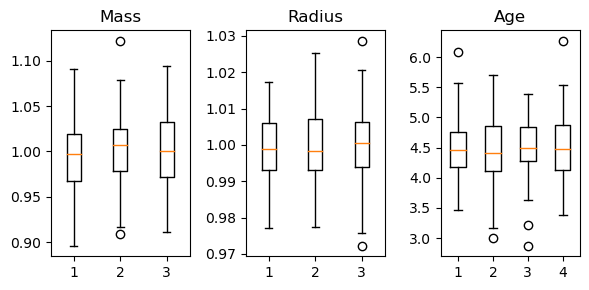

In [11]:
def plot(Ms=Ms, Rs=Rs, As=As):
    print(directory)
    plt.figure(figsize=(6,3))
    for label, xs, idx in zip(['Mass', 'Radius', 'Age'], [Ms, Rs, As], [131, 132, 133]):
        plt.subplot(idx)
        plt.boxplot(xs)
        plt.title(label)
    plt.tight_layout();

plot()

## Case 2

One inconsistent (mass) measurement 

Also, the seismic radius measurement is missing.

In [12]:
directory = 'inputs/1_one_inconsistent_M'
os.makedirs(directory, exist_ok=True)

In [13]:
# copy first test case
Ms_inc = Ms.copy()
Rs_miss = Rs.copy()

# disrupt the first measurement such that its mass is off by 1 Msun 
Ms_inc[0] = Ms[0] + 1 

# remove seismic radius measurement 
Rs_miss[0] = []

In [14]:
save_data(directory, Ms_inc, Rs_miss, As)

inputs/1_one_inconsistent_M


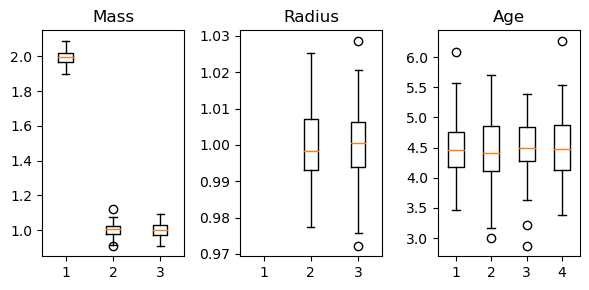

In [15]:
plot(Ms=Ms_inc, Rs=Rs_miss)

## Case 3

Two inconsistent (radius) measurements

Also, the seismic and granulation mass measurements are missing. 

In [16]:
directory = 'inputs/2_two_inconsistent_R'
os.makedirs(directory, exist_ok=True)

In [17]:
# copy first test case
Rs_inc = Rs.copy()
Ms_miss = Ms.copy()

# disrupt the first two measurements such that their radii are off by 0.5 and 1 Rsun 
Rs_inc[0] = Rs[0] + 0.5 
Rs_inc[1] = Rs[1] + 1 

# remove seismic and granulation mass measurements 
Ms_miss[0] = []
Ms_miss[1] = []

In [18]:
save_data(directory, Ms_miss, Rs_inc, As)

inputs/2_two_inconsistent_R


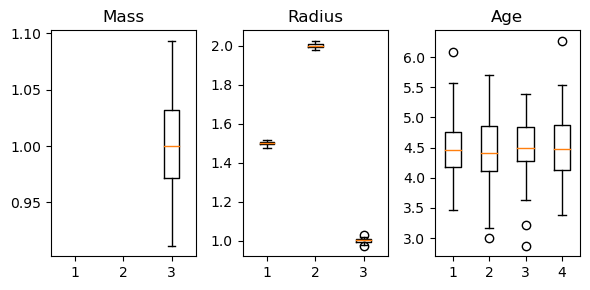

In [19]:
plot(Ms=Ms_miss, Rs=Rs_inc)

## Case 4

Three inconsistent (age) measurements.

In [20]:
directory = 'inputs/3_three_inconsistent_A'
os.makedirs(directory, exist_ok=True)

In [21]:
# copy first test case
As_inc = As.copy()

# disrupt the first three measurements such that their ages are off by 2, 4, and 6 Gyr
As_inc[0] = As[0] + 2 
As_inc[1] = As[1] + 4 
As_inc[2] = As[2] + 6 

In [22]:
save_data(directory, Ms, Rs, As_inc)

inputs/3_three_inconsistent_A


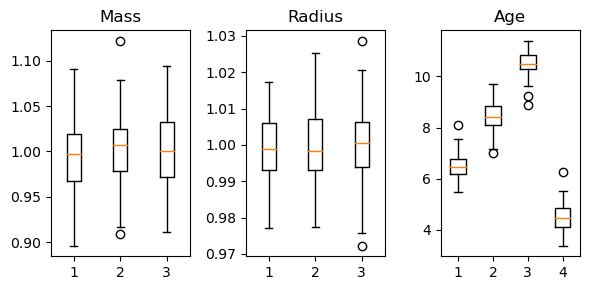

In [23]:
plot(As=As_inc)

## Case 5

Consistent but invalid measurements (radius is very high) 

In [24]:
directory = 'inputs/4_invalid'
os.makedirs(directory, exist_ok=True)

In [25]:
# copy first test case
Rs_inv = Rs.copy()

# disrupt the radius measurements by adding 10 solar radii 
Rs_inv = [R_inv + 10 for R_inv in Rs_inv]

In [26]:
save_data(directory, Ms, Rs_inv, As)

inputs/4_invalid


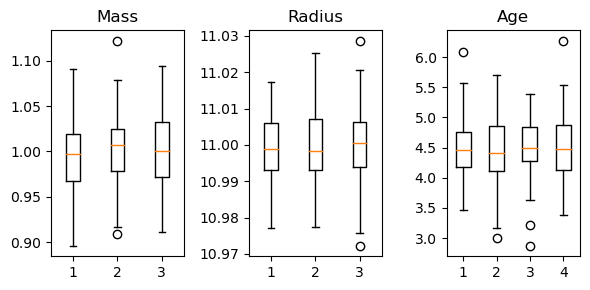

In [27]:
plot(Rs=Rs_inv)